In [1]:

import numpy as np
import pandas as pd
from glob import glob
import xml.etree.ElementTree as xet
import os
import cv2
from shutil import copy

# **Labeling**

In [2]:
path = glob('/kaggle/input/egyptiannumberplates-1/*.xml') + glob('/kaggle/input/egyptiannumberplates-2/*.xml') + glob('/kaggle/input/egyptiannumberplates-3/*.xml')


print(path[:5])
print(path[-5:])

['/kaggle/input/egyptiannumberplates-1/2023-07-02_18-06-59_UTC.xml', '/kaggle/input/egyptiannumberplates-1/2023-04-13_01-20-06_UTC.xml', '/kaggle/input/egyptiannumberplates-1/2023-10-05_01-32-29_UTC.xml', '/kaggle/input/egyptiannumberplates-1/2023-08-05_01-15-29_UTC_1.xml', '/kaggle/input/egyptiannumberplates-1/2023-07-08_11-49-37_UTC.xml']
['/kaggle/input/egyptiannumberplates-3/2022-05-10_12-31-10_UTC.xml', '/kaggle/input/egyptiannumberplates-3/2022-04-20_22-55-50_UTC.xml', '/kaggle/input/egyptiannumberplates-3/2022-05-24_16-00-38_UTC.xml', '/kaggle/input/egyptiannumberplates-3/2022-04-14_15-08-17_UTC_2.xml', '/kaggle/input/egyptiannumberplates-3/2022-06-18_11-45-26_UTC_2.xml']


In [3]:
labels_dict = dict(filepath=[],xmin=[],xmax=[],ymin=[],ymax=[])
for filename in path:

    #filename = path[0]
    info = xet.parse(filename)
    root = info.getroot()
     # Attempt to find 'object' element
    member_object = root.find('object')
    
    if member_object is not None:
        labels_info = member_object.find('bndbox')
        if labels_info is not None:
            xmin = int(labels_info.find('xmin').text)
            xmax = int(labels_info.find('xmax').text)
            ymin = int(labels_info.find('ymin').text)
            ymax = int(labels_info.find('ymax').text)
            labels_dict['filepath'].append(filename)
            labels_dict['xmin'].append(xmin)
            labels_dict['xmax'].append(xmax)
            labels_dict['ymin'].append(ymin)
            labels_dict['ymax'].append(ymax)
        else:
            print(f"No 'bndbox' element found in {filename}")
    else:
        print(f"No 'object' element found in {filename}")

No 'object' element found in /kaggle/input/egyptiannumberplates-1/2023-10-05_01-29-06_UTC.xml
No 'object' element found in /kaggle/input/egyptiannumberplates-2/2022-01-16_09-49-53_UTC_10.xml
No 'object' element found in /kaggle/input/egyptiannumberplates-2/2022-01-12_15-23-57_UTC.xml
No 'object' element found in /kaggle/input/egyptiannumberplates-2/2022-01-05_22-47-56_UTC.xml
No 'object' element found in /kaggle/input/egyptiannumberplates-2/2022-01-02_23-52-55_UTC.xml
No 'object' element found in /kaggle/input/egyptiannumberplates-2/2022-01-04_11-33-49_UTC_1.xml
No 'object' element found in /kaggle/input/egyptiannumberplates-2/2022-01-17_12-51-41_UTC_1.xml
No 'object' element found in /kaggle/input/egyptiannumberplates-2/2022-01-12_20-13-47_UTC.xml
No 'object' element found in /kaggle/input/egyptiannumberplates-2/2022-01-10_19-18-20_UTC.xml
No 'object' element found in /kaggle/input/egyptiannumberplates-2/2022-01-13_12-52-20_UTC_2.xml
No 'object' element found in /kaggle/input/egyptian

In [4]:
df = pd.DataFrame(labels_dict)
df.head()

,filepath,xmin,xmax,ymin,ymax
0,/kaggle/input/egyptiannumberplates-1/2023-07-0...,369,564,704,803
1,/kaggle/input/egyptiannumberplates-1/2023-04-1...,584,720,679,751
2,/kaggle/input/egyptiannumberplates-1/2023-10-0...,330,498,275,363
3,/kaggle/input/egyptiannumberplates-1/2023-08-0...,368,503,678,758
4,/kaggle/input/egyptiannumberplates-1/2023-07-0...,570,758,922,1031


In [5]:
df.to_csv('labelsEG.csv',index=False)

In [6]:
df = pd.read_csv('labelsEG.csv')
df.head()

,filepath,xmin,xmax,ymin,ymax
0,/kaggle/input/egyptiannumberplates-1/2023-07-0...,369,564,704,803
1,/kaggle/input/egyptiannumberplates-1/2023-04-1...,584,720,679,751
2,/kaggle/input/egyptiannumberplates-1/2023-10-0...,330,498,275,363
3,/kaggle/input/egyptiannumberplates-1/2023-08-0...,368,503,678,758
4,/kaggle/input/egyptiannumberplates-1/2023-07-0...,570,758,922,1031


In [7]:
# parsing
def parsing(path):
    parser = xet.parse(path).getroot()
    name = parser.find('filename').text
    root, ext = os.path.splitext(path)
    filename = root + '.jpg'

    # width and height
    parser_size = parser.find('size')
    width = int(parser_size.find('width').text)
    height = int(parser_size.find('height').text)
    
    return filename, width, height
df[['filename','width','height']] = df['filepath'].apply(parsing).apply(pd.Series)

In [8]:
# center_x, center_y, width , height
df['center_x'] = (df['xmax'] + df['xmin'])/(2*df['width'])
df['center_y'] = (df['ymax'] + df['ymin'])/(2*df['height'])

df['bb_width'] = (df['xmax'] - df['xmin'])/df['width']
df['bb_height'] = (df['ymax'] - df['ymin'])/df['height']

In [9]:
print(df.head())

                                            filepath  xmin  xmax  ymin  ymax  \
0  /kaggle/input/egyptiannumberplates-1/2023-07-0...   369   564   704   803   
1  /kaggle/input/egyptiannumberplates-1/2023-04-1...   584   720   679   751   
2  /kaggle/input/egyptiannumberplates-1/2023-10-0...   330   498   275   363   
3  /kaggle/input/egyptiannumberplates-1/2023-08-0...   368   503   678   758   
4  /kaggle/input/egyptiannumberplates-1/2023-07-0...   570   758   922  1031   

                                            filename  width  height  center_x  \
0  /kaggle/input/egyptiannumberplates-1/2023-07-0...   1080    1080  0.431944   
1  /kaggle/input/egyptiannumberplates-1/2023-04-1...   1078    1078  0.604824   
2  /kaggle/input/egyptiannumberplates-1/2023-10-0...    842     842  0.491686   
3  /kaggle/input/egyptiannumberplates-1/2023-08-0...   1080    1080  0.403241   
4  /kaggle/input/egyptiannumberplates-1/2023-07-0...   1080    1350  0.614815   

   center_y  bb_width  bb_height

# **Training**

In [10]:
### split the data into train and test
length = df.shape[0]
print(length)
df_train = df.iloc[:int(0.8 * length)]
df_test = df.iloc[int(0.8 * length):]

3585


In [11]:
%%bash
git clone https://github.com/ultralytics/yolov5  # clone
cd yolov5
pip install -r requirements.txt  # install

Cloning into 'yolov5'...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.1/720.1 kB 18.8 MB/s eta 0:00:00


In [12]:
train_folder = './yolov5/data_images/train'
# Create the train folder if it doesn't exist
os.makedirs(train_folder, exist_ok=True)
values = df_train[['filename','center_x','center_y','bb_width','bb_height']].values
for fname, x,y, w, h in values:
    image_name = os.path.split(fname)[-1]
    txt_name = os.path.splitext(image_name)[0]
    
    dst_image_path = os.path.join(train_folder,image_name)
    dst_label_file = os.path.join(train_folder,txt_name+'.txt')
    
    # copy each image into the folder
    copy(fname,dst_image_path)

    # generate .txt which has label info
    label_txt = f'0 {x} {y} {w} {h}'
    with open(dst_label_file,mode='w') as f:
        f.write(label_txt)
        
        f.close()

In [13]:
test_folder = './yolov5/data_images/test'
# Create the test folder if it doesn't exist
os.makedirs(test_folder, exist_ok=True)
values = df_test[['filename','center_x','center_y','bb_width','bb_height']].values
for fname, x,y, w, h in values:
    image_name = os.path.split(fname)[-1]
    txt_name = os.path.splitext(image_name)[0]
    
    dst_image_path = os.path.join(test_folder,image_name)
    dst_label_file = os.path.join(test_folder,txt_name+'.txt')
    
    # copy each image into the folder
    copy(fname,dst_image_path)

    # generate .txt which has label info
    label_txt = f'0 {x} {y} {w} {h}'
    with open(dst_label_file,mode='w') as f:
        f.write(label_txt)
        
        f.close()

In [14]:
import yaml

config_data = {
    'train': "data_images/train",
    'val': "data_images/test",
    'nc': 1,
    'names': [
    'license_plate'
    ]
}

# Save the YAML file
with open('yolov5/data.yaml', 'w') as yaml_file:
    yaml.dump(config_data, yaml_file)


In [15]:
os.chdir('yolov5')

In [16]:
#Train
!python train.py --data data.yaml --weights yolov5s.pt --batch-size 8 --name Model --img 640 --epochs 25

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-03-09 22:19:52.877689: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-09 22:19:52.877807: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-09 22:19:53.006699: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train:

In [17]:
#!python export.py --weights /kaggle/working/yolov5/runs/train/Model2/weights/best.pt --include onnx --simplify

# **Predict**

In [18]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

In [19]:
# settings
INPUT_WIDTH =  640
INPUT_HEIGHT = 640

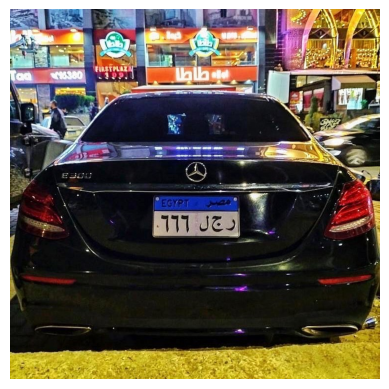

In [20]:
# LOAD THE IMAGE

img = cv2.imread('/kaggle/input/egyptiannumberplates-3/2022-04-01_09-03-42_UTC.jpg')


# Convert BGR to RGB (Matplotlib uses RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')  
plt.show()


In [21]:
# LOAD YOLO MODEL
#/kaggle/working/yolov5/runs/train/Model3/weights/best.onnx
net = cv2.dnn.readNetFromONNX('/kaggle/input/yolo-model/best.onnx')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

In [22]:
def get_detections(img,net):
    # CONVERT IMAGE TO YOLO FORMAT
    image = img.copy()
    row, col, d = image.shape

    max_rc = max(row,col)
    input_image = np.zeros((max_rc,max_rc,3),dtype=np.uint8)
    input_image[0:row,0:col] = image

    # GET PREDICTION FROM YOLO MODEL
    blob = cv2.dnn.blobFromImage(input_image,1/255,(INPUT_WIDTH,INPUT_HEIGHT),swapRB=True,crop=False)
    net.setInput(blob)
    preds = net.forward()
    detections = preds[0]
    
    return input_image, detections
def non_maximum_supression(input_image,detections):
    # FILTER DETECTIONS BASED ON CONFIDENCE AND PROBABILIY SCORE
    # center x, center y, w , h, conf, proba
    boxes = []
    confidences = []

    image_w, image_h = input_image.shape[:2]
    x_factor = image_w/INPUT_WIDTH
    y_factor = image_h/INPUT_HEIGHT

    for i in range(len(detections)):
        row = detections[i]
        confidence = row[4] # confidence of detecting license plate
        if confidence > 0.4:
            class_score = row[5] # probability score of license plate
            if class_score > 0.25:
                cx, cy , w, h = row[0:4]

                left = int((cx - 0.5*w)*x_factor)
                top = int((cy-0.5*h)*y_factor)
                width = int(w*x_factor)
                height = int(h*y_factor)
                box = np.array([left,top,width,height])

                confidences.append(confidence)
                boxes.append(box)

    # clean
    boxes_np = np.array(boxes).tolist()
    confidences_np = np.array(confidences).tolist()
    # NMS
    index = cv2.dnn.NMSBoxes(boxes_np,confidences_np,0.25,0.45).flatten()
    
    return boxes_np, confidences_np, index

def drawings(image,boxes_np,confidences_np,index):
    # drawings
    for ind in index:
        x,y,w,h =  boxes_np[ind]
        bb_conf = confidences_np[ind]
        conf_text = 'plate: {:.0f}%'.format(bb_conf*100)


        cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
#         cv2.rectangle(image,(x,y-30),(x+w,y),(0,255,0),-1)
#         cv2.rectangle(image,(x,y+h),(x+w,y+h+30),(0,255,0),-1)


#         cv2.putText(image,conf_text,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),1)
#         cv2.putText(image,license_text,(x,y+h+27),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),1)

    return image

In [23]:
# predictions
def yolo_predictions(img,net):
    ## step-1: detections
    input_image, detections = get_detections(img,net)
    ## step-2: NMS
    boxes_np, confidences_np, index = non_maximum_supression(input_image, detections)
    ## step-3: Drawings
    result_img = drawings(img,boxes_np,confidences_np,index)
    return result_img, boxes_np[index[0]]

(-0.5, 748.5, 748.5, -0.5)

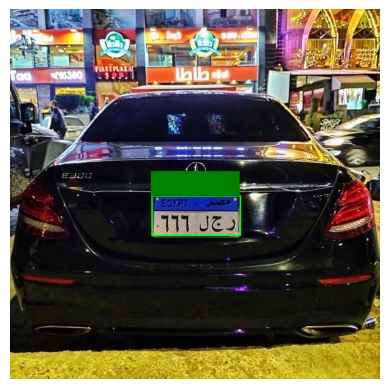

In [24]:
# test
img = cv2.imread('/kaggle/input/egyptiannumberplates-3/2022-04-01_09-03-42_UTC.jpg')

results, box = yolo_predictions(img, net)

# Convert BGR to RGB (Matplotlib uses RGB)
results_rgb = cv2.cvtColor(results, cv2.COLOR_BGR2RGB)


x, y, w, h = box


img_pil = Image.fromarray(cv2.cvtColor(results_rgb, cv2.COLOR_BGR2RGB))
draw = ImageDraw.Draw(img_pil)



# Define the box coordinates (x, y, width, height)
box_x, box_y, box_width, box_height = x-2, y, w, 50

rectangle_y = box_y - 50  # Adjust the distance between the rectangle and the box
rectangle_height = box_height  # Adjust the height of the rectangle
rectangle_width = box_width  # Match the width of the box
draw.rectangle([(box_x, rectangle_y), (box_x + rectangle_width, rectangle_y + rectangle_height)], fill='green')


# Convert the image back to OpenCV format
img = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)


plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
